### Notes - how to use Data Science to solve business problems

- Figure out the business objective
- What are the business goals
- Data Gathering
- Model
- Evaluation
- Implementation
- Predict House Prices with Multiple Features

In [1]:
# Dependencies
import pandas as pd
import pandas_profiling as pp
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# heightweight
df_heightWeight = pd.read_csv('devData/heightweight.csv')
df_heightWeight.head()
df_heightWeight.tail()
df_heightWeight.shape

,gender,ageYear,ageMonth,HeightIn,WeightLB
0,f,11.91667,143,56.3,85.0
1,f,12.91667,155,62.3,105.0
2,f,12.75000,153,63.3,108.0
3,f,13.41667,161,59.0,92.0
4,f,15.91667,191,62.5,112.5


,gender,ageYear,ageMonth,HeightIn,WeightLB
232,m,13.66667,164,66.5,112.0
233,m,15.75000,189,65.0,114.0
234,m,13.66667,164,61.5,140.0
235,m,13.91667,167,62.0,107.5
236,m,12.58333,151,59.3,87.0


(237, 5)

## KC House Data - King County House Data

In [4]:
# kc_house_data
df = pd.read_csv('devData/kc_house_data.csv')
df.head()
df.tail()
df.shape

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


(21613, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [6]:
# pandas profile report
profile = pp.ProfileReport(df)

In [7]:
# print profile
profile

Number of variables,21
Number of observations,21613
Total Missing (%),0.0%
Total size in memory,3.5 MiB
Average record size in memory,168.0 B
Numeric,19
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [8]:
# returns number of unique elements for zipcode
df.zipcode.nunique()

70

In [12]:
# returns array of unique zip codes
df.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [13]:
# unique zip code count
df.zipcode.value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
98042    548
98034    545
98118    508
98023    499
98006    498
98133    494
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    410
98056    406
98053    405
98001    362
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98004    317
98199    317
        ... 
98168    269
98112    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    234
98105    229
98045    221
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    118
98109    109
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [14]:
# sqft living mean
df.sqft_living.mean()

2079.8997362698374

In [15]:
# sqft living median
df.sqft_living.median()

1910.0

In [16]:
# sqft living mode
df.sqft_living.mode()

0    1300
dtype: int64

In [17]:
# look for outliers
# the max value for bedrooms is 33
# is this an error / outlier? 
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [18]:
# print data for the home that has 33 bedrooms
df[df.bedrooms==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


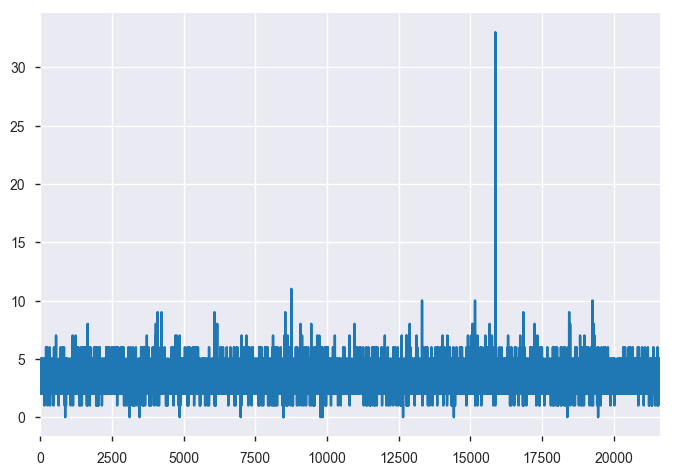

In [19]:
# plot bedrooms
# notice the one outlier for 33 bedrooms
df.bedrooms.plot()

In [20]:
# 15870 is the index
# lets change 33 bedrooms to 3
df.set_value(15870, 'bedrooms', 3).tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


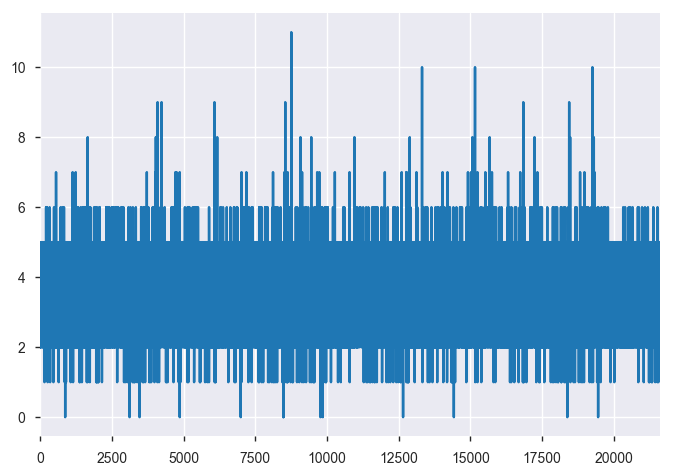

In [21]:
# plot bedrooms again to see if replaced the outlier to 3 bedrooms
df.bedrooms.plot()

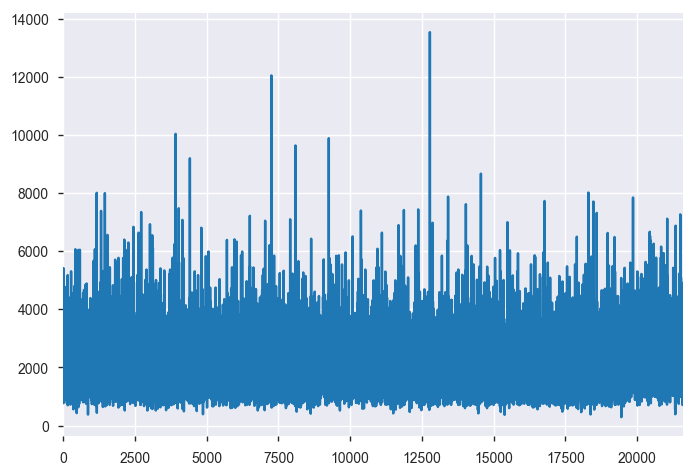

In [22]:
# plot sqft living
df.sqft_living.plot()

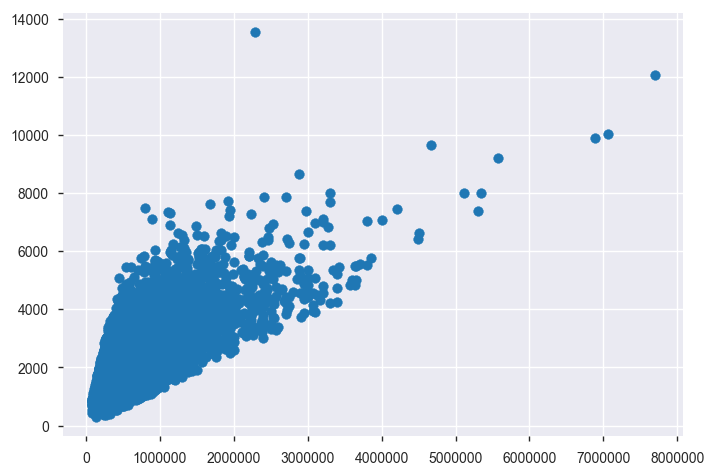

In [23]:
# the house at 13,000 sqft at 2mill is an outlier... remove it
plt.scatter(df.price, df.sqft_living)

In [28]:
# find houses > 8000 sqft
df[df.sqft_living > 8000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
12777,1225069038,20140505T000000,2280000.0,7,8.00,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800
14556,2303900035,20140611T000000,2888000.0,5,6.25,8670,64033,2.0,0,4,...,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021
18302,6072800246,20140702T000000,3300000.0,5,6.25,8020,21738,2.0,0,0,...,11,8020,0,2001,0,98006,47.5675,-122.189,4160,18969


In [29]:
# remove row 12777
df.drop(df.index[12777], inplace=True)

# print df from index 12775 to 12779 to make sure that 12777 is dropped
df[12775:12779]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12775,7812800155,20150318T000000,170000.0,3,1.0,790,6750,1.0,0,0,...,6,790,0,1944,0,98178,47.4984,-122.240,960,6298
12776,7228500610,20150330T000000,510000.0,2,1.0,1070,5280,1.0,0,0,...,6,1070,0,1900,0,98122,47.6168,-122.303,1380,2370
12778,5162100650,20140922T000000,316000.0,4,2.5,2320,7379,2.0,0,0,...,8,2320,0,1987,0,98003,47.3432,-122.316,2230,7614
12779,3904902510,20140512T000000,690000.0,4,2.5,2670,13463,2.0,0,0,...,9,2670,0,1989,0,98029,47.5627,-122.018,2560,10982


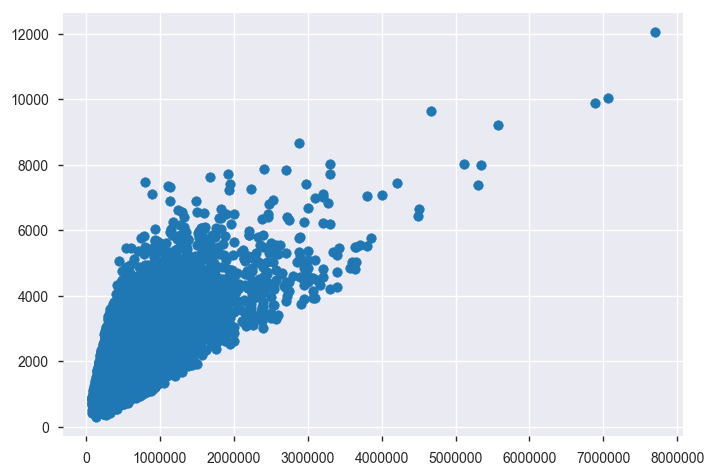

In [30]:
# plot price and sqft_living again
plt.scatter(df.price, df.sqft_living)

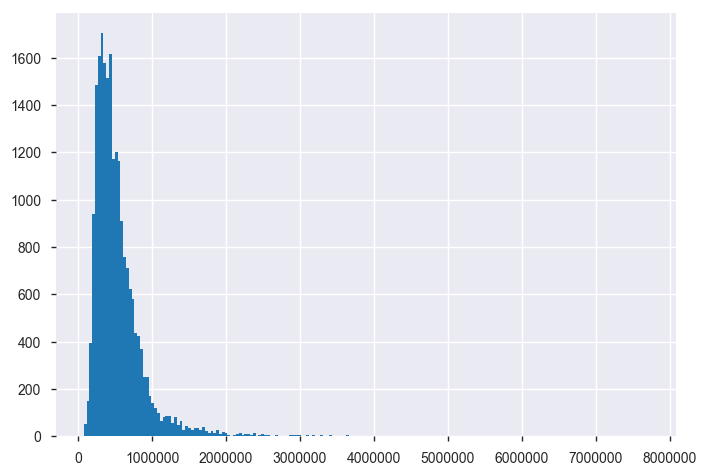

In [31]:
# build a histogram for price, bins = 200 (bins= buckets)
# note that the histogram is heavlily skewed right
# The few larger values bring the mean upwards but 
# don’t really affect the median. 
# So when data are skewed right, the mean is larger than the median. 
df.price.hist(bins=200)

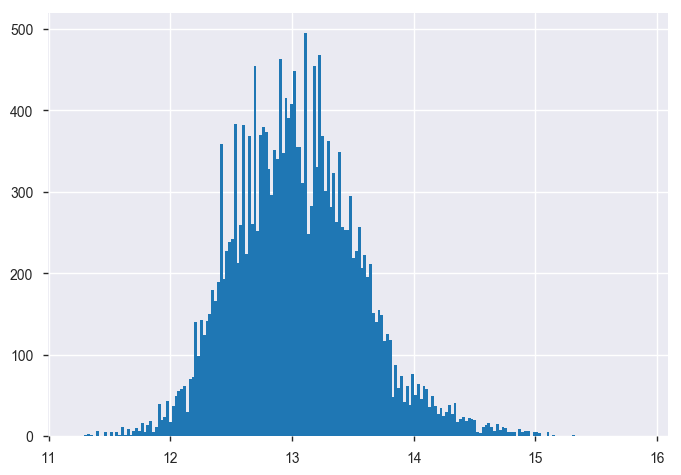

In [34]:
# plot a histogram... log distribution
# note - the ; after bins=200 prints the hist without the array
plt.hist(np.log(df.price), bins=200);

In [35]:
# find correlations 
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016516,0.002692,0.005580,-0.011627,-0.131884,0.018680,-0.002726,0.011865,-0.023818,0.008333,-0.010366,-0.004691,0.021433,-0.016919,-0.008250,-0.001849,0.020888,-0.002677,-0.138578
price,-0.016516,1.000000,0.314841,0.524443,0.702196,0.088259,0.256362,0.266527,0.396644,0.036519,0.667181,0.605050,0.322643,0.053832,0.126546,-0.053129,0.306997,0.021284,0.585003,0.080948
bedrooms,0.002692,0.314841,1.000000,0.528659,0.591515,0.031552,0.180681,-0.006596,0.081101,0.025554,0.366076,0.490045,0.308520,0.159066,0.019667,-0.157073,-0.010705,0.133653,0.402172,0.029067
bathrooms,0.005580,0.524443,0.528659,1.000000,0.753990,0.085456,0.500434,0.063861,0.186355,-0.124929,0.664785,0.684354,0.281574,0.506378,0.050882,-0.203978,0.024332,0.222784,0.568154,0.084745
sqft_living,-0.011627,0.702196,0.591515,0.753990,1.000000,0.169553,0.353679,0.104244,0.282953,-0.058601,0.763567,0.876157,0.432346,0.318655,0.055685,-0.199883,0.052271,0.240170,0.757045,0.179833
sqft_lot,-0.131884,0.088259,0.031552,0.085456,0.169553,1.000000,-0.006121,0.021657,0.073229,-0.008763,0.112579,0.181067,0.012487,0.052831,0.007721,-0.129572,-0.086037,0.229271,0.143466,0.717867
floors,0.018680,0.256362,0.180681,0.500434,0.353679,-0.006121,1.000000,0.023714,0.028831,-0.263737,0.457933,0.523819,-0.247299,0.489295,0.006367,-0.059071,0.049524,0.125240,0.279509,-0.012256
waterfront,-0.002726,0.266527,-0.006596,0.063861,0.104244,0.021657,0.023714,1.000000,0.402102,0.016651,0.082816,0.072253,0.080764,-0.026158,0.092884,0.030283,-0.014271,-0.041906,0.086515,0.030774
view,0.011865,0.396644,0.081101,0.186355,0.282953,0.073229,0.028831,0.402102,1.000000,0.046159,0.250700,0.165975,0.275608,-0.053688,0.104023,0.084981,0.005984,-0.078816,0.279758,0.070999
condition,-0.023818,0.036519,0.025554,-0.124929,-0.058601,-0.008763,-0.263737,0.016651,0.046159,1.000000,-0.144613,-0.158258,0.174663,-0.361400,-0.060625,0.003012,-0.014919,-0.106461,-0.092741,-0.003191


In [36]:
# find corr by price
df.corr().price

id              -0.016516
price            1.000000
bedrooms         0.314841
bathrooms        0.524443
sqft_living      0.702196
sqft_lot         0.088259
floors           0.256362
waterfront       0.266527
view             0.396644
condition        0.036519
grade            0.667181
sqft_above       0.605050
sqft_basement    0.322643
yr_built         0.053832
yr_renovated     0.126546
zipcode         -0.053129
lat              0.306997
long             0.021284
sqft_living15    0.585003
sqft_lot15       0.080948
Name: price, dtype: float64

In [37]:
# corr to price desc
df.corr().price.sort_values(ascending=False)

price            1.000000
sqft_living      0.702196
grade            0.667181
sqft_above       0.605050
sqft_living15    0.585003
bathrooms        0.524443
view             0.396644
sqft_basement    0.322643
bedrooms         0.314841
lat              0.306997
waterfront       0.266527
floors           0.256362
yr_renovated     0.126546
sqft_lot         0.088259
sqft_lot15       0.080948
yr_built         0.053832
condition        0.036519
long             0.021284
id              -0.016516
zipcode         -0.053129
Name: price, dtype: float64

# Model

In [38]:
import statsmodels.api as sm

In [39]:
# independent variables
X = df[['sqft_living', 'grade', 'sqft_above']]
# dependent variables
y = df['price']

In [40]:
X.head()
y.head()

,sqft_living,grade,sqft_above
0,1180,7,1180
1,2570,7,2170
2,770,6,770
3,1960,7,1050
4,1680,8,1680


0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [41]:
X1 = sm.add_constant(X)
X1.tail()

,const,sqft_living,grade,sqft_above
21608,1.0,1530,8,1530
21609,1.0,2310,8,2310
21610,1.0,1020,7,1020
21611,1.0,1600,8,1600
21612,1.0,1020,7,1020


In [ ]:
# X1 = sm.add_constant(X)

In [42]:
# OLS oridnary least squares
reg = sm.OLS (y, X1)
model = reg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     8483.
Date:                Thu, 24 May 2018   Prob (F-statistic):               0.00
Time:                        11:12:10   Log-Likelihood:            -2.9917e+05
No. Observations:               21612   AIC:                         5.983e+05
Df Residuals:                   21608   BIC:                         5.984e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.497e+05   1.35e+04    -47.954      0.000   -6.76e+05   -6.23e+05
sqft_living   235.7361      4.048     58.232      0.000     227.801     243.671
grade        1.095e+05   2321.916     47.176      0.000    1.05e+05    1.14e+05
sqft_above    -77.8225      4.423    -17.597      0.000     -86.491     -69.154
==============================================================================
Omnibus:                    17098.883   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1058194.058
Skew:                           3.328   Prob(JB):                         0.00
Kurtosis:                      36.627   Cond. No.                     2.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
# ^^^ p value is important here
model.params

const         -649735.463813
sqft_living       235.736077
grade          109539.792181
sqft_above        -77.822498
dtype: float64

In [44]:
model.pvalues

const          0.000000e+00
sqft_living    0.000000e+00
grade          0.000000e+00
sqft_above     7.874588e-69
dtype: float64

In [45]:
model.conf_int()

,0,1
const,-676292.862072,-623178.065554
sqft_living,227.801198,243.670956
grade,104988.665831,114090.918532
sqft_above,-86.490989,-69.154007


In [46]:
# build regression based on 3 features
# x1 - sqft living
# x2 - grade
# x3 - sqft_above
def predict(x1, x2, x3):
    return(model.params[0] + model.params[1] * x1 + model.params[2] * x2 + model.params[3] * x3)

In [47]:
# pass through values to predict in the function
predict(5400, 10, 4000)

1407347.2815464234

In [48]:
# this model is known as statistical learning - multi-variable regression

In [49]:
# next lets validate the model by checking the data set for a home that is 5400 sqft
df[df['sqft_living']==5400]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6984,203100440,20140911T000000,1210000.0,3,3.75,5400,24740,2.0,0,0,...,11,5400,0,1997,0,98053,47.6426,-121.955,1690,20000


### Our model was $200K off